<a href="https://colab.research.google.com/github/DommiiUdomp/Well/blob/main/TiszaMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas contextily geoplot

In [22]:
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as cx
import geoplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon, box

%matplotlib inline

In [2]:
df = pd.read_excel('/content/Geological Log_4.xlsx', sheet_name='Simp3 (2)')

In [3]:
loc = df.iloc[14:18,30:36]
loc

Unnamed: 30 Unnamed: 31             K(m/d)                 n  Ss  \
14         K50     (WGS'84    N47° 55' 46,97"   E21° 02' 51,59" NaN   
15         K75     (WGS'84    N47° 55' 51.32"   E21° 03' 00.23" NaN   
16         K77     (WGS'84   N47° 55' 53.61""   E21° 03' 00.90" NaN   
17        K123     (WGS'84    N47° 56' 00.47"   E21° 03' 10.80" NaN   

                      Sy  
14  47.929714, 21.047664  
15  47.930922, 21.050064  
16  47.931558, 21.050250  
17  47.933464, 21.053000

In [4]:
loc[['lon','lat']] = loc['Sy'].str.split(',',expand=True)

In [5]:
loc.columns

Index(['Unnamed: 30', 'Unnamed: 31', 'K(m/d)', 'n', 'Ss', 'Sy', 'lon', 'lat'], dtype='object')

In [6]:
loc.columns = ['Well', 'Coordinate', 'N', 'E', 'NaN', 'Coor', 'lat', 'lon']

In [7]:
loc.drop(columns=['Coordinate','N',	'E',	'NaN'	,'Coor'	], inplace = True)

In [8]:
loc

Well        lat         lon
14   K50  47.929714   21.047664
15   K75  47.930922   21.050064
16   K77  47.931558   21.050250
17  K123  47.933464   21.053000

# ***GeoDataFrame***

<AxesSubplot:>

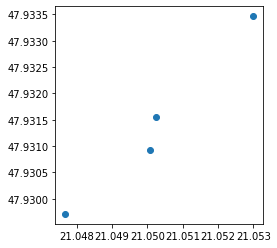

In [9]:
loc_gdf = gpd.GeoDataFrame(loc, geometry=gpd.points_from_xy(loc.lon, loc.lat), crs="EPSG:4326")
loc_gdf.plot()

In [ ]:
!pip install tqdm osmnx

In [10]:
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)
ox.__version__

'1.1.2'

In [11]:
p = gpd.tools.geocode(["Tiszaújváros Posta"], provider='nominatim', user_agent="maksym demo")
print(p)

                    geometry  \
0  POINT (21.03705 47.93303)   

                                             address  
0  Posta, 9, Bethlen Gábor út, Kertváros, Tiszaúj...  


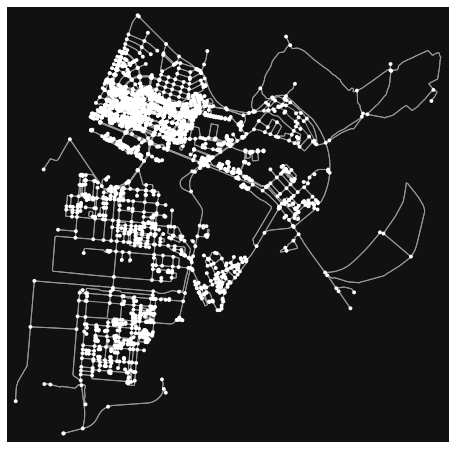

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [13]:
G = ox.graph_from_place('Tiszaújváros, Hungary')
ox.plot_graph(G)

In [14]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

43097922.297332294

In [15]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:370: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:380: UserWarning: The `clean_intersects` and `tolerance` arguments have been deprecated and will be removed in a future release. Use the `clean_int_tol` argument instead.
  warnings.warn(msg)


{'circuity_avg': 1.0718871272086576,
 'clean_intersection_count': 963,
 'clean_intersection_density_km': 22.34446462073668,
 'edge_density_km': 13821.297321260172,
 'edge_length_avg': 73.63941129929508,
 'edge_length_total': 595669.1979999979,
 'intersection_count': 2415,
 'intersection_density_km': 56.03518386197205,
 'k_avg': 5.553724682457947,
 'm': 8089,
 'n': 2913,
 'node_density_km': 67.59026525462716,
 'self_loop_proportion': 0.0036101083032490976,
 'street_density_km': 7030.836844279987,
 'street_length_avg': 72.92766787003607,
 'street_length_total': 303014.4599999999,
 'street_segment_count': 4155,
 'streets_per_node_avg': 2.8688637143837967,
 'streets_per_node_counts': {0: 0,
  1: 498,
  2: 1,
  3: 1813,
  4: 591,
  5: 7,
  6: 2,
  7: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1709577754891864,
  2: 0.00034328870580157915,
  3: 0.622382423618263,
  4: 0.20288362512873326,
  5: 0.002403020940611054,
  6: 0.0006865774116031583,
  7: 0.00034328870580157915}}

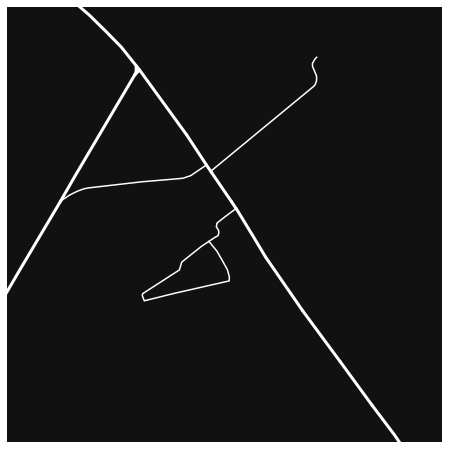

In [27]:
# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 240
dpi = 40

place = 'Sziget Csárda, Hungary'
fig, ax = ox.plot_figure_ground(address=place, default_width=3, dpi=dpi)
#Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

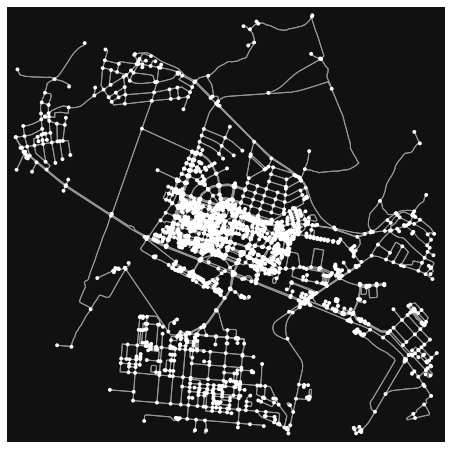

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [30]:
tisza = ox.graph_from_address('Tiszaújváros Posta',  dist=3000)
ox.plot_graph(tisza)

In [31]:
type(tisza)

networkx.classes.multidigraph.MultiDiGraph

# ***contextily***

In [37]:
%time tisza_hu = cx.Place("Tiszaújváros, HU")

CPU times: user 15.7 ms, sys: 5 ms, total: 20.7 ms
Wall time: 417 ms


<AxesSubplot:title={'center':'Tiszaújváros, Tiszaújvárosi járás, Borsod-Abaúj-Zemplén megye, Észak-Magyarország, Alföld és Észak, Magyarország'}, xlabel='X', ylabel='Y'>

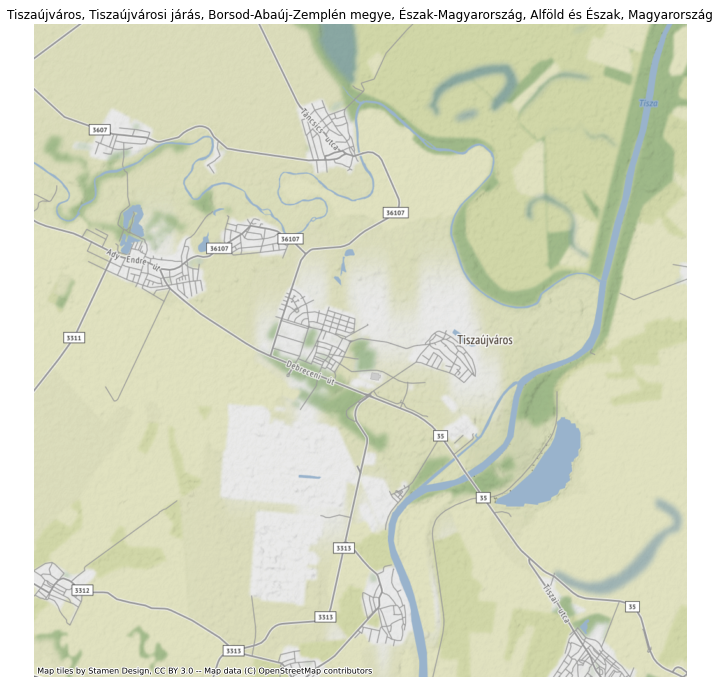

In [38]:
tisza_hu.plot()

(1280, 1536, 4)
(2342030.5466578, 2349368.501373177, 6092948.398667965, 6099063.360930783)


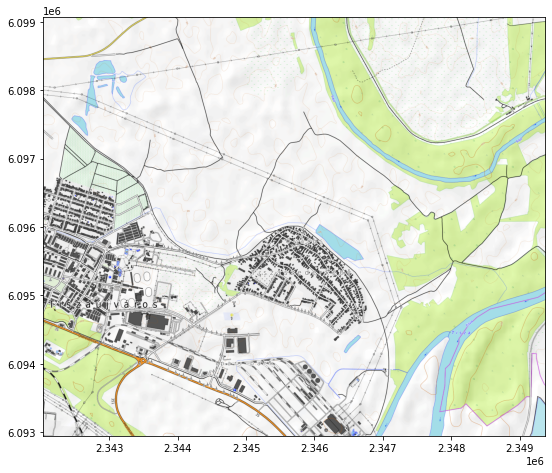

In [41]:
#west, south, east, north = (21.026356, 47.908744,21.115653 , 47.950955)
west, south, east, north = (21.040323,47.923681,21.101434, 47.948871)
tz_img, tz_ext = cx.bounds2img(west,south,east,north,ll=True,source=cx.providers.OpenTopoMap())
print(tz_img.shape)
print(tz_ext)

fig, ax = plt.subplots(1, figsize=(9, 9))
ax.imshow(tz_img, extent=tz_ext)

fig.show()

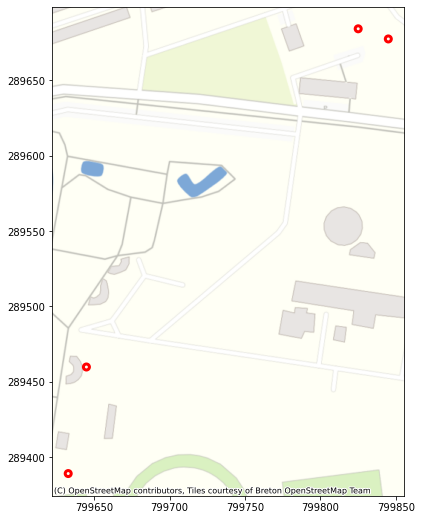

In [139]:
ax = loc_gdf.plot(figsize=(9,9), color="none", edgecolor="r", linewidth=3)
cx.add_basemap(ax, crs=loc_gdf.crs.to_string(), source=cx.providers.OpenStreetMap.BZH)

In [59]:
tisza_hu.bbox_map

(2333469.5994898607, 2353037.4787308658, 6085610.443952593, 6105178.323193595)

In [57]:
loc['X'] = [289684,289389.15,289459.79,289677.27]
loc['Y'] = [799825, 799632.76, 799644.83, 799844.97]
#EPSG:23700

In [65]:
loc

Well        lat         lon                       geometry          X  \
14   K50  47.929714   21.047664  POINT (289684.000 799825.000)  289684.00   
15   K75  47.930922   21.050064  POINT (289389.150 799632.760)  289389.15   
16   K77  47.931558   21.050250  POINT (289459.790 799644.830)  289459.79   
17  K123  47.933464   21.053000  POINT (289677.270 799844.970)  289677.27   

            Y  
14  799825.00  
15  799632.76  
16  799644.83  
17  799844.97

<AxesSubplot:>

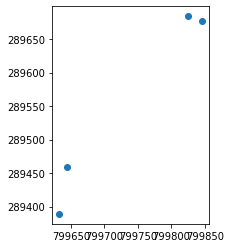

In [94]:
loc_gdf = gpd.GeoDataFrame(loc, geometry=gpd.points_from_xy(loc.Y, loc.X), crs="EPSG:23700")
loc_gdf.plot()

In [95]:
loc_gdf

Well        lat         lon                       geometry          X  \
14   K50  47.929714   21.047664  POINT (799825.000 289684.000)  289684.00   
15   K75  47.930922   21.050064  POINT (799632.760 289389.150)  289389.15   
16   K77  47.931558   21.050250  POINT (799644.830 289459.790)  289459.79   
17  K123  47.933464   21.053000  POINT (799844.970 289677.270)  289677.27   

            Y  
14  799825.00  
15  799632.76  
16  799644.83  
17  799844.97

In [96]:
loc_gdf.crs

<Projected CRS: EPSG:23700>
Name: HD72 / EOV
Axis Info [cartesian]:
- Y[east]: Easting (metre)
- X[north]: Northing (metre)
Area of Use:
- name: Hungary.
- bounds: (16.11, 45.74, 22.9, 48.58)
Coordinate Operation:
- name: Egyseges Orszagos Vetuleti
- method: Hotine Oblique Mercator (variant B)
Datum: Hungarian Datum 1972
- Ellipsoid: GRS 1967
- Prime Meridian: Greenwich

In [123]:
loc_gdf3857 = loc_gdf.to_crs({'init': 'epsg:3857'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [124]:
loc_gdf3857

Well        lat         lon                         geometry          X  \
14   K50  47.929714   21.047664  POINT (2343577.556 6095803.492)  289684.00   
15   K75  47.930922   21.050064  POINT (2343280.014 6095370.426)  289389.15   
16   K77  47.931558   21.050250  POINT (2343300.683 6095475.479)  289459.79   
17  K123  47.933464   21.053000  POINT (2343607.040 6095792.674)  289677.27   

            Y  
14  799825.00  
15  799632.76  
16  799644.83  
17  799844.97

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 18 is not valid for the current tile provider (valid zooms: 0 - 17).
  warnings.warn(msg)


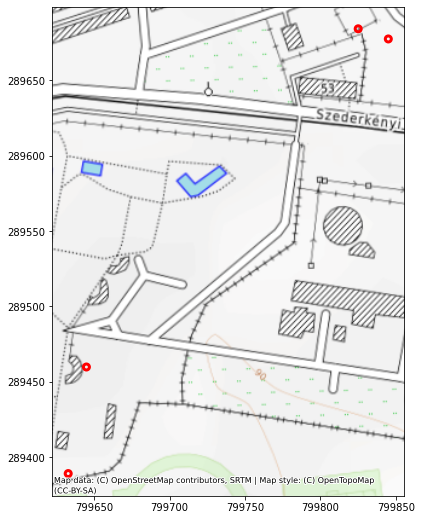

In [97]:
ax = loc_gdf.plot(figsize=(9,9), color="none", edgecolor="r", linewidth=3)
cx.add_basemap(ax, crs=loc_gdf.crs.to_string(), source=cx.providers.OpenTopoMap())

In [127]:
loc_gdf3857.centroid

14    POINT (2343577.556 6095803.492)
15    POINT (2343280.014 6095370.426)
16    POINT (2343300.683 6095475.479)
17    POINT (2343607.040 6095792.674)
dtype: geometry

In [132]:
e = 2343300 -500
w = 2343300 +500
s = 6095400 -500
n = 6095400 +500

<AxesSubplot:title={'center':'Tiszaújváros, Tiszaújvárosi járás, Borsod-Abaúj-Zemplén megye, Észak-Magyarország, Alföld és Észak, Magyarország'}, xlabel='X', ylabel='Y'>

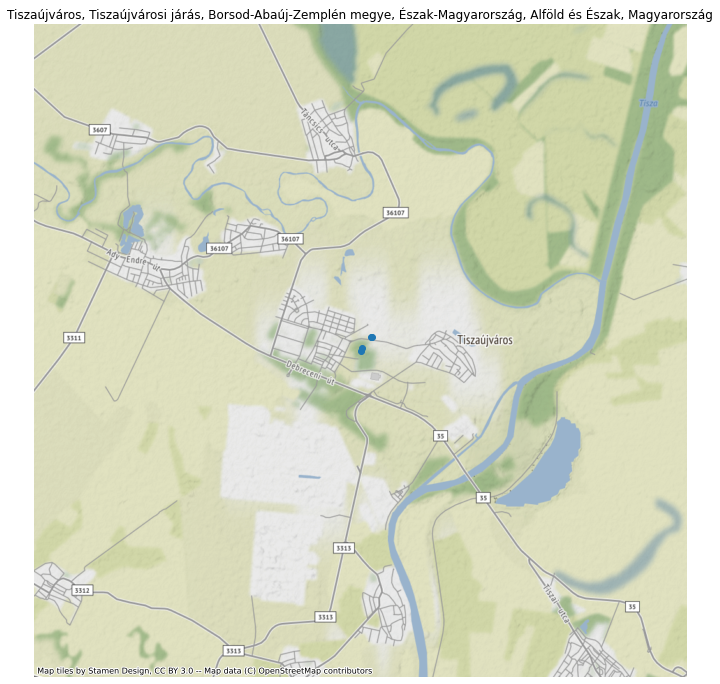

In [133]:
ax = tisza_hu.plot()
loc_gdf3857.cx[e:w, s:n].plot(ax=ax)
#ax2 = loc_gdf3857.plot(ax=ax, markersize=2)

In [113]:
tisza_hu.w, tisza_hu.e, tisza_hu.s, tisza_hu.n

(21.0008009, 21.1246342, 47.8750189, 47.971844)

In [110]:
tisza_hu.bbox_map

(2333469.5994898607, 2353037.4787308658, 6085610.443952593, 6105178.323193595)

In [111]:
tisza_hu.bbox_map[0]

2333469.5994898607

In [79]:
# Create random points within map bbox
Y = np.random.uniform(low=tisza_hu.bbox_map[2], high=tisza_hu.bbox_map[3], size=(8000,))
X = np.random.uniform(low=tisza_hu.bbox_map[1], high=tisza_hu.bbox_map[0], size=(8000,))
r_points = [Point(x,y) for x,y in zip(X,Y)]
df = gpd.GeoDataFrame(r_points, geometry=0, crs='epsg:23700')

In [118]:
# Create random points within map bbox
Y = np.random.uniform(low=tisza_hu.bbox_map[2], high=tisza_hu.bbox_map[3], size=(8000,))
X = np.random.uniform(low=tisza_hu.bbox_map[1], high=tisza_hu.bbox_map[0], size=(8000,))
r_points = [Point(x,y) for x,y in zip(X,Y)]
dff = gpd.GeoDataFrame(r_points, geometry=0, crs='epsg:3857')

In [114]:
# Create random points within map bbox
Y = np.random.uniform(low=tisza_hu.s, high=tisza_hu.n, size=(8000,))
X = np.random.uniform(low=tisza_hu.e, high=tisza_hu.w, size=(8000,))
r_points = [Point(x,y) for x,y in zip(X,Y)]
dfdf = gpd.GeoDataFrame(r_points, geometry=0, crs='epsg:4326')

In [ ]:
dff

In [ ]:
df

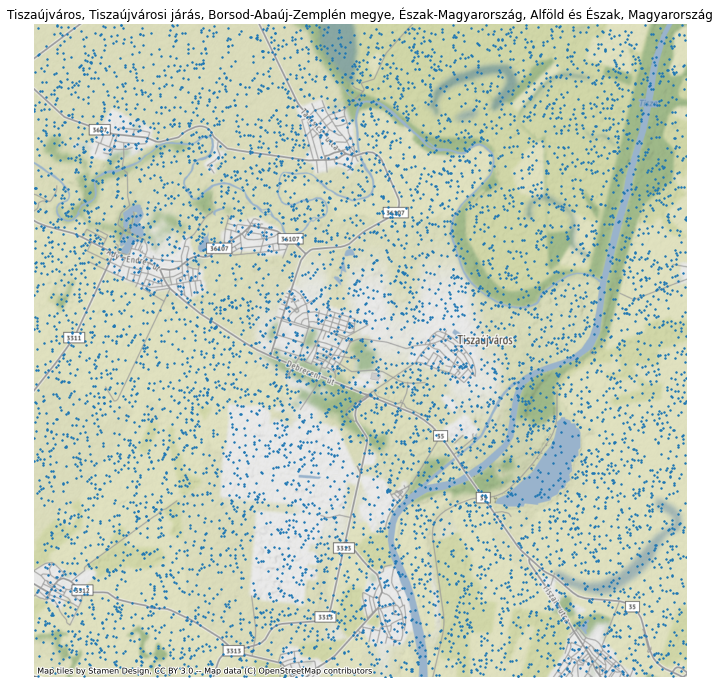

In [120]:
ax = tisza_hu.plot()
ax2 = dff.plot(ax=ax, markersize=2)

# ***Raster***

In [141]:
import rasterio
from rasterio.plot import show as rioshow
from shapely.geometry import box
from rasterio.plot import show_hist

In [134]:
tisza_hu.w, tisza_hu.e, tisza_hu.s, tisza_hu.n

(21.0008009, 21.1246342, 47.8750189, 47.971844)

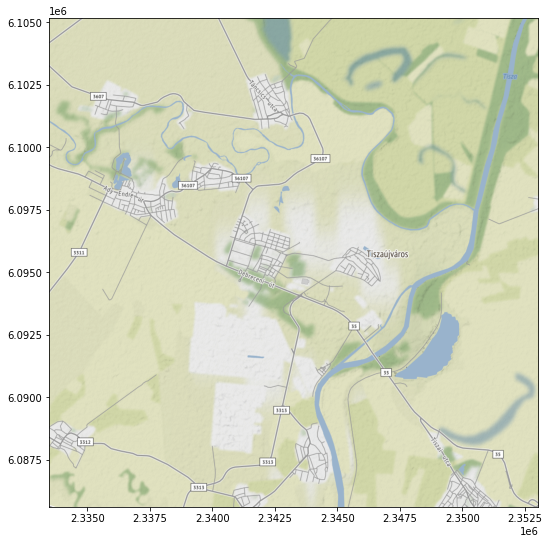

In [149]:
tis_img, tis_ext = cx.bounds2raster(tisza_hu.w, tisza_hu.s, tisza_hu.e, tisza_hu.n,
                             "/content/tisza_hu.tif",
                             source=cx.providers.Stamen.Terrain,
                             ll=True
                            )

fig, ax = plt.subplots(1, figsize=(9, 9))
ax.imshow(tis_img, extent=tis_ext)
fig.show()

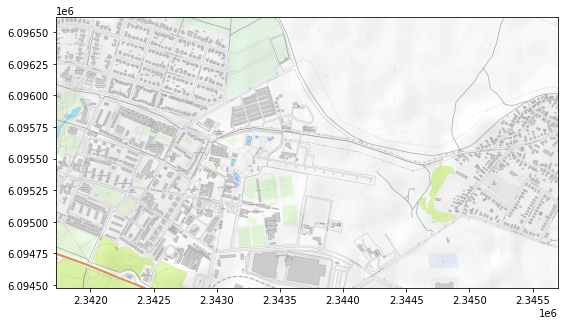

In [194]:
a,b = 47.927142, 21.036160
c,d = 47.937608, 21.071179
img, ext = cx.bounds2raster(b,a, d,c, "/content/tis_hu.tif", 
                            source=cx.providers.OpenTopoMap(), ll=True)
fig, ax = plt.subplots(1, figsize=(9, 9))
ax.imshow(img, extent=ext)
fig.show()

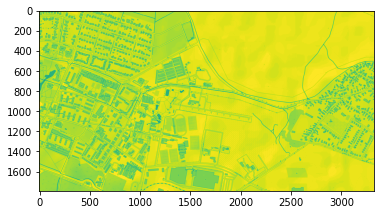

In [195]:
tisza_rs = rasterio.open("/content/tis_hu.tif")
plt.imshow(tisza_rs.read(1))

plt.show()

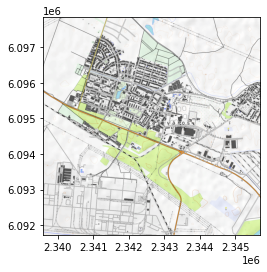

<AxesSubplot:>

In [178]:
rioshow(tisza_rs)

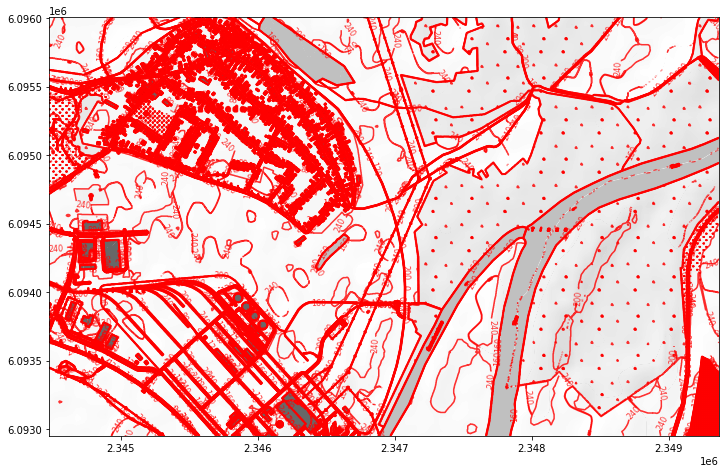

In [165]:
fig, ax = plt.subplots(1, figsize=(12, 12))
rioshow((tisza_rs, 1), cmap='Greys_r', interpolation='none', ax=ax)
rioshow((tisza_rs, 1), contour=True, ax=ax)

plt.show()

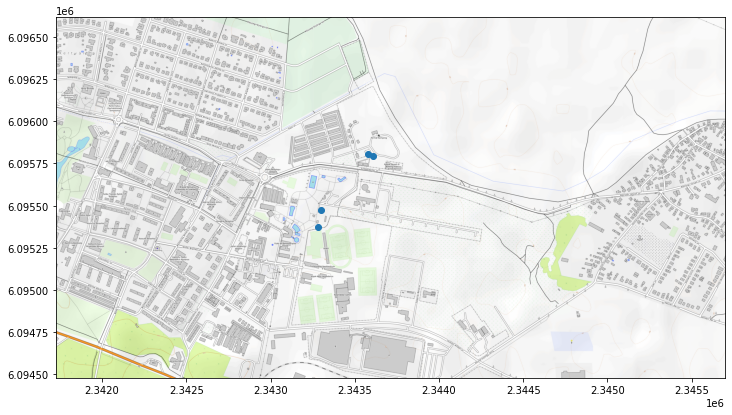

In [196]:
fig, ax = plt.subplots(1, figsize=(12, 12))
rioshow(tisza_rs, ax=ax)
loc_gdf3857.plot(ax=ax)

plt.show()

In [201]:
loc_gdf4326 = loc_gdf.to_crs({'init': 'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [202]:
loc_gdf4326

Well        lat         lon                   geometry          X  \
14   K50  47.929714   21.047664  POINT (21.05272 47.93353)  289684.00   
15   K75  47.930922   21.050064  POINT (21.05004 47.93092)  289389.15   
16   K77  47.931558   21.050250  POINT (21.05023 47.93155)  289459.79   
17  K123  47.933464   21.053000  POINT (21.05298 47.93346)  289677.27   

            Y  
14  799825.00  
15  799632.76  
16  799644.83  
17  799844.97

In [207]:
loc_gdf4326['Longitude'] = pd.to_numeric(loc_gdf4326.lon, errors='coerce')
loc_gdf4326['Latitude'] = pd.to_numeric(loc_gdf4326.lat, errors='coerce')

In [210]:
fig = px.scatter_mapbox(loc_gdf4326, lat='Latitude',lon='Latitude', mapbox_style='open-street-map')
fig.show()